<a href="https://colab.research.google.com/github/poornimababu2021-maker/data-analysis/blob/main/MNIST_week3_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

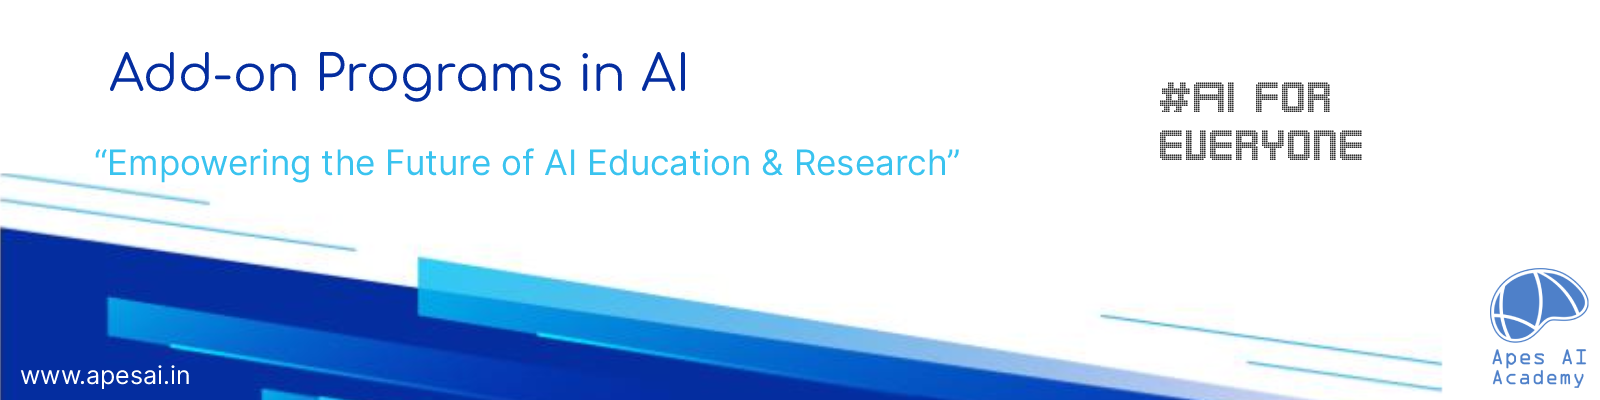

# Task



*   Load MNIST dataset (Hand written digits dataset)
*   Train DNN and experiment with different number of layers and neurons.
*  Now train the DNN with only two class from the dataset (A binary classifier using DNN)
* Apply Normalization to the image data and then train, and analyze the improvement.


**Search and find the code/solution and solve errors. Do not use any Copilot*



In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
X_train.shape



(60000, 28, 28)

In [29]:

X_test.shape

(10000, 28, 28)

In [30]:
y_train.shape

(60000,)

In [31]:
y_test.shape

(10000,)

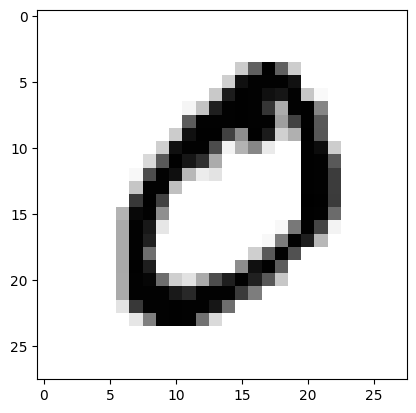

In [33]:
plt.imshow(X_train[1], cmap = 'binary')
plt.show()

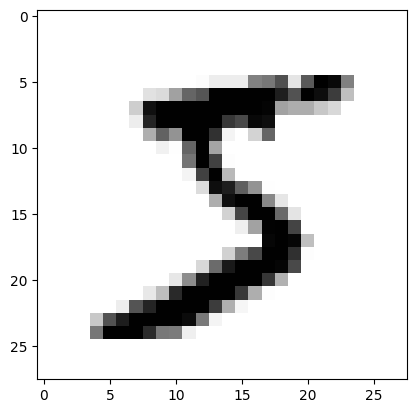

In [42]:
plt.imshow(X_train[0], cmap = 'binary')
plt.show()

In [34]:
y_train[1]


np.uint8(0)

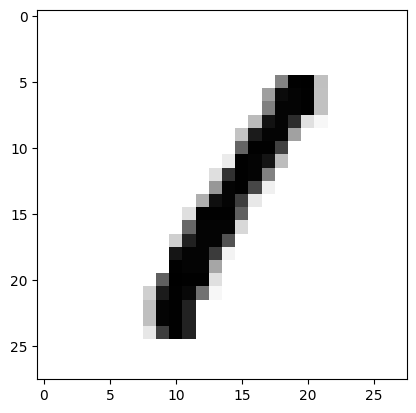

In [36]:
plt.imshow(X_train[3], cmap = 'binary')
plt.show()

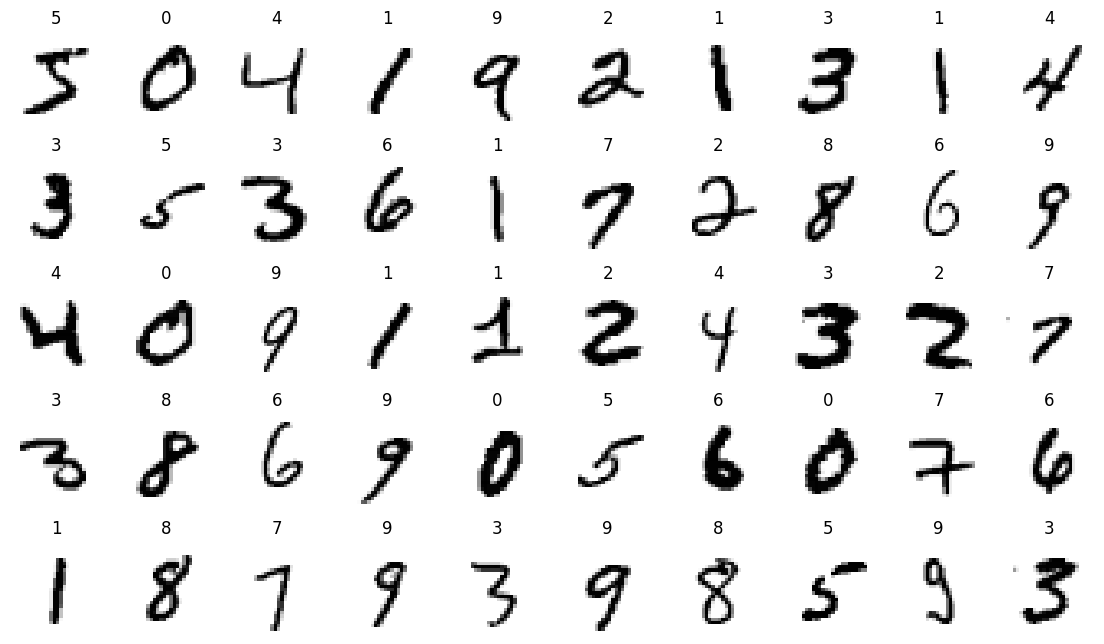

In [38]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

n_rows = 5
n_cols = 10
plt.figure(figsize = (n_cols*1.4, n_rows*1.6))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])

plt.show()

In [46]:
ANN = keras.models.Sequential()
ANN.add(keras.layers.Dense(100, activation = 'relu', input_shape = (784,)))
ANN.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
ANN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
ANN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [44]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")


In [49]:
# Ensure the data is in the correct shape for the model
x_train_reshaped = x_train.reshape(-1, 784)
x_test_reshaped = x_test.reshape(-1, 784)

history_ANN = ANN.fit(x_train_reshaped, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9228 - loss: 0.2705 - val_accuracy: 0.9370 - val_loss: 0.2202
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9243 - loss: 0.2631 - val_accuracy: 0.9385 - val_loss: 0.2140
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9250 - loss: 0.2573 - val_accuracy: 0.9412 - val_loss: 0.2073
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9277 - loss: 0.2527 - val_accuracy: 0.9428 - val_loss: 0.2021
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9281 - loss: 0.2517 - val_accuracy: 0.9437 - val_loss: 0.1983
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9293 - loss: 0.2386 - val_accuracy: 0.9458 - val_loss: 0.1938
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9339 - loss: 0.2334 - val_accuracy: 0.9487 - val_loss: 0.1880
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9337 - loss: 0.2283

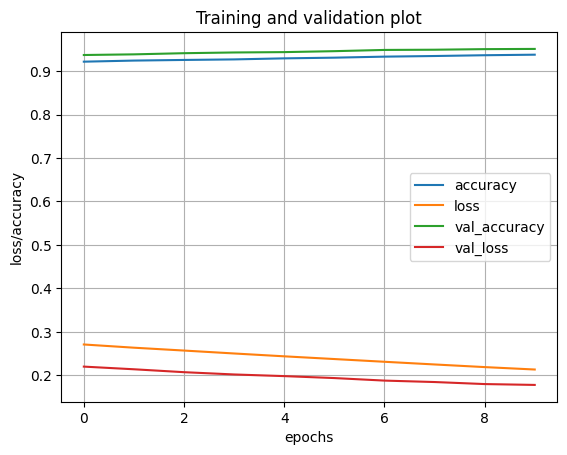

In [52]:
import pandas as pd
pd.DataFrame(history_ANN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [53]:
test_loss, test_accuracy = ANN.evaluate(x_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9302 - loss: 0.2441
Test loss: 0.2147279977798462, Test accuracy: 0.9398999810218811


In [59]:
DNN = keras.models.Sequential()
DNN.add(keras.layers.Dense(600, activation = 'relu', input_shape = (784,)))
DNN.add(keras.layers.Dense(300, activation = 'relu'))
DNN.add(keras.layers.Dense(100, activation = 'relu'))
DNN.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
DNN.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,410 (2.60 MB)

 Trainable params: 682,410 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])


In [57]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")


In [61]:
# Ensure the data is in the correct shape for the model
x_train_reshaped = x_train.reshape(-1, 784)

history_DNN = DNN.fit(x_train_reshaped, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.6625 - loss: 0.9894 - val_accuracy: 0.9215 - val_loss: 0.2614
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9088 - loss: 0.2980 - val_accuracy: 0.9515 - val_loss: 0.1678
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9368 - loss: 0.2017 - val_accuracy: 0.9525 - val_loss: 0.1624
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9538 - loss: 0.1528 - val_accuracy: 0.9650 - val_loss: 0.1167
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9625 - loss: 0.1204 - val_accuracy: 0.9700 - val_loss: 0.1013
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9715 - loss: 0.0897 - val_accuracy: 0.9728 - val_loss: 0.0906
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9743 - loss: 0.0840 - val_accuracy: 0.9682 - val_loss: 0.1020
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9792 -

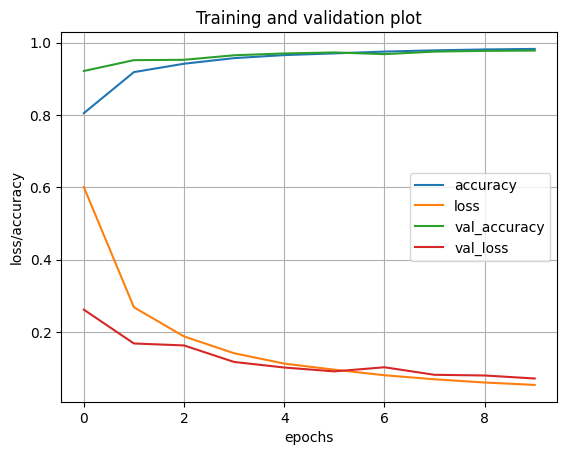

In [62]:
import pandas as pd
pd.DataFrame(history_DNN.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [63]:
test_loss, test_accuracy = DNN.evaluate(x_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9734 - loss: 0.0872
Test loss: 0.07566419988870621, Test accuracy: 0.9767000079154968


In [64]:
train_mask = (y_train == 0) | (y_train == 1)
x_train_binary = x_train[train_mask]
y_train_binary = y_train[train_mask]

test_mask = (y_test == 0) | (y_test == 1)
x_test_binary = x_test[test_mask]
y_test_binary = y_test[test_mask]

print("Original training data shape:", x_train.shape)
print("Filtered training data shape:", x_train_binary.shape)
print("Original testing data shape:", x_test.shape)
print("Filtered testing data shape:", x_test_binary.shape)


Original training data shape: (60000, 784)
Filtered training data shape: (12665, 784)
Original testing data shape: (10000, 784)
Filtered testing data shape: (2115, 784)


In [68]:
DNN_binary = keras.models.Sequential()
DNN_binary.add(keras.layers.Dense(600, activation = 'relu', input_shape = (784,)))
DNN_binary.add(keras.layers.Dense(300, activation = 'relu'))
DNN_binary.add(keras.layers.Dense(100, activation = 'relu'))
DNN_binary.add(keras.layers.Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
DNN_binary.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [70]:
# Ensure the data is in the correct shape for the model
x_train_binary_reshaped = x_train_binary.reshape(-1, 784)
x_test_binary_reshaped = x_test_binary.reshape(-1, 784)

history_DNN_binary = DNN_binary.fit(x_train_binary_reshaped, y_train_binary, epochs = 10, validation_split = 0.1)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9721 - loss: 0.1812 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9982 - loss: 0.0068 - val_accuracy: 0.9992 - val_loss: 9.7510e-04
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9990 - loss: 0.0047 - val_accuracy: 0.9992 - val_loss: 0.0022
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9987 - loss: 0.0055 - val_accuracy: 0.9984 - val_loss: 0.0044
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9989 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 4.4797e-04
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 5.5461e-04
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9990 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 1.3497e-04
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9992 - loss: 0

In [69]:
# Redefine and compile the binary DNN model with the correct input shape for flattened data
DNN_binary = keras.models.Sequential()
DNN_binary.add(keras.layers.Dense(600, activation = 'relu', input_shape = (784,)))
DNN_binary.add(keras.layers.Dense(300, activation = 'relu'))
DNN_binary.add(keras.layers.Dense(100, activation = 'relu'))
DNN_binary.add(keras.layers.Dense(1, activation = 'sigmoid'))

DNN_binary.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

DNN_binary.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 681,501 (2.60 MB)

 Trainable params: 681,501 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
test_loss_binary, test_accuracy_binary = DNN_binary.evaluate(x_test_binary, y_test_binary)
print("Test loss for binary classifier: {}, Test accuracy for binary classifier: {}".format(test_loss_binary, test_accuracy_binary))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.7396e-04
Test loss for binary classifier: 0.0009507986251264811, Test accuracy for binary classifier: 0.9995272159576416


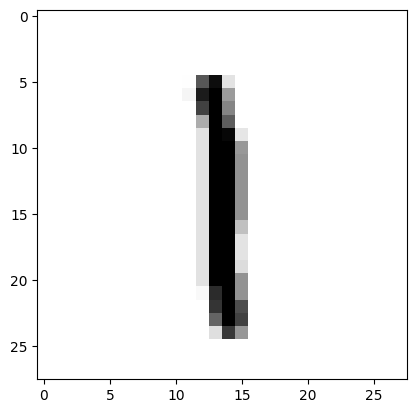

In [73]:
plt.imshow(x_train_binary[4].reshape(28, 28), cmap = 'binary')
plt.show()

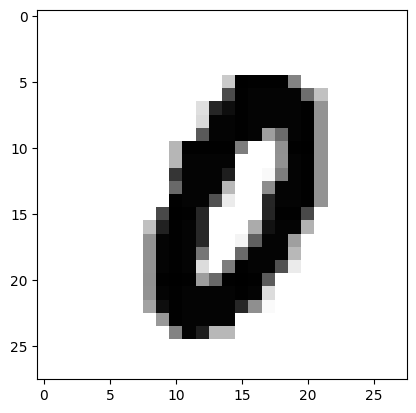

In [75]:
plt.imshow(x_train_binary[8].reshape(28, 28), cmap = 'binary')
plt.show()

In [76]:
x_mean = x_train . mean()
x_std = x_train.std()

x_train_stand = x_train - x_mean / (x_std)
x_test_stand = x_test - x_mean /(x_std)

In [77]:
(x_train,y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [79]:
# Ensure the normalized data is in the correct shape for the model
x_train_normalized_reshaped = x_train.reshape(-1, 784)
x_test_normalized_reshaped = x_test.reshape(-1, 784)

history_DNN_normalized = DNN.fit(x_train_normalized_reshaped, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9777 - loss: 5.2206 - val_accuracy: 0.9778 - val_loss: 2.1030
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9871 - loss: 0.5297 - val_accuracy: 0.9720 - val_loss: 1.3775
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9896 - loss: 0.2266 - val_accuracy: 0.9760 - val_loss: 0.6770
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9906 - loss: 0.0930 - val_accuracy: 0.9743 - val_loss: 0.4785
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9881 - loss: 0.0962 - val_accuracy: 0.9693 - val_loss: 0.3474
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9885 - loss: 0.0526 - val_accuracy: 0.9730 - val_loss: 0.3115
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9906 - loss: 0.0506 - val_accuracy: 0.9775 - val_loss: 0.2125
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9921 -